In [35]:
import numpy as np
import pandas as pd
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics import mean_squared_error, mean_absolute_error, accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt

# 📂 Carregar os dados com ajustes para evitar erros
ratings_df = pd.read_csv("../bookdataset/BX-Book-Ratings.csv", sep=";", encoding="latin-1", on_bad_lines='skip',  low_memory=False  )

books_df = pd.read_csv( "../bookdataset/BX-Books.csv", sep=";", encoding="latin-1", quotechar='"', on_bad_lines='skip', low_memory=False)

users_df = pd.read_csv("../bookdataset/BX-Users.csv", sep=";", encoding="latin-1", on_bad_lines='skip', low_memory=False)

📋 Número total de usuários antes da filtragem: 105283
📋 Número total de livros antes da filtragem: 340556

📋 Usuários restantes após ajuste: 688
📋 Livros restantes após ajuste: 415
📚 Livros recomendados usando KNN (mais similar para menos similar):
- The Hot Zone (Sim: 0.24)
- The Shipping News : A Novel (Sim: 0.19)
- The Alienist (Sim: 0.18)
- The Summons (Sim: 0.18)
- The God of Small Things (Sim: 0.17)


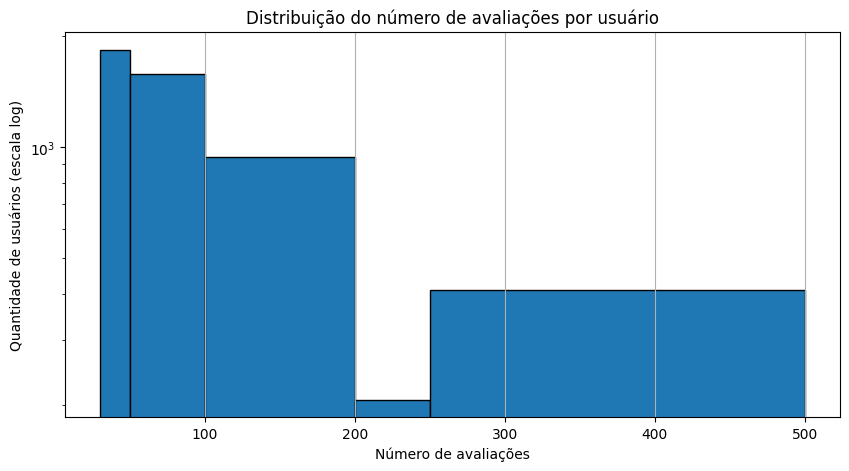

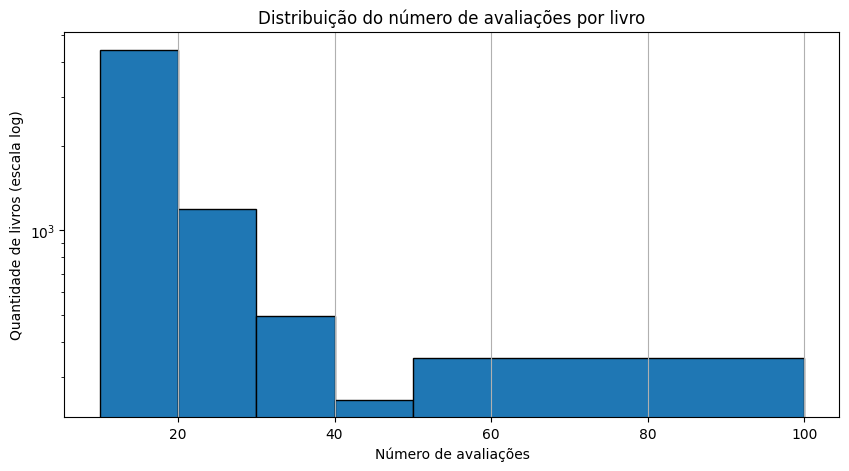

In [ ]:

# 📊 Contar usuários e livros antes da filtragem
num_users_before = ratings_df['User-ID'].nunique()
num_books_before = ratings_df['ISBN'].nunique()
print(f"📋 Número total de usuários antes da filtragem: {num_users_before}")
print(f"📋 Número total de livros antes da filtragem: {num_books_before}")

# 🔍 Filtrar usuários e livros com interações mínimas
user_id_counts = ratings_df['User-ID'].value_counts()
filtered_user_ids = user_id_counts[user_id_counts >= 250].index  # Considerar usuários que avaliaram pelo menos 250 livros
ratings_df = ratings_df[ratings_df['User-ID'].isin(filtered_user_ids)]

isbn_counts = ratings_df['ISBN'].value_counts()
filtered_isbn = isbn_counts[isbn_counts >= 50].index  # Considerar livros com pelo menos 50 avaliações
ratings_df = ratings_df[ratings_df['ISBN'].isin(filtered_isbn)]

# 📊 Contar usuários e livros após a filtragem
num_users_after = ratings_df['User-ID'].nunique()
num_books_after = ratings_df['ISBN'].nunique()
print(f"\n📋 Usuários restantes após ajuste: {num_users_after}")
print(f"📋 Livros restantes após ajuste: {num_books_after}")

# 🔗 Mesclar as avaliações com os títulos dos livros
merged_df = pd.merge(ratings_df, books_df[['Book-Title', 'ISBN']], on='ISBN')

# 📊 Criar uma tabela pivot para representar a relação entre livros e usuários
pivot_table = merged_df.pivot_table(index='ISBN', columns='User-ID', values='Book-Rating').fillna(0)

# 📌 Função para recomendar livros similares usando KNN
def knn_recommendation(book_title, recommend_size=5):
    books = []
    
    # 🔍 Encontrar o ISBN do livro a partir do título
    isbn = books_df.loc[books_df['Book-Title'] == book_title, 'ISBN'].values[0]
    
    # 🔹 Treinar o modelo KNN com base na similaridade dos livros
    knn_model = NearestNeighbors(n_neighbors=recommend_size+1, metric='cosine').fit(pivot_table.values)
    
    # 📌 Encontrar os livros mais próximos com base na similaridade de coseno
    distances, indices = knn_model.kneighbors([pivot_table.loc[isbn].values], n_neighbors=recommend_size+1)
    
    # 📚 Armazenar os livros recomendados (excluindo o próprio livro consultado)
    for i in range(1, len(indices[0])):
        books.append([pivot_table.index[indices[0][i]], distances[0][i]])
    
    # 🔹 Ordenar do mais similar para o menos similar (menor distância significa maior similaridade)
    books.sort(key=lambda x: x[1])

    return books  # Retorna uma lista de recomendações com ISBNs e similaridades

# 📌 Obter recomendações para um livro específico
book_title = "The Angel of Darkness"  # Título do livro para busca de similares
recommend_size = 5  # Quantidade de livros recomendados
knn_books = knn_recommendation(book_title, recommend_size)

# 🔄 Ordenar os resultados do mais similar para o menos similar
knn_books.sort(key=lambda x: 1 - x[1], reverse=True)

# 🖨️ Exibir os livros recomendados com valores de similaridade mais intuitivos
print("📚 Livros recomendados usando KNN:")
for isbn, similarity in knn_books:
    book_title = books_df.loc[books_df['I


# 📊 Criar gráfico da distribuição de avaliações dos usuários
plt.figure(figsize=(10, 5))
user_id_counts.hist(bins=[30, 50, 100, 200, 250, 500], edgecolor='black', log=True)
plt.title("Distribuição do número de avaliações por usuário")
plt.xlabel("Número de avaliações")
plt.ylabel("Quantidade de usuários (escala log)")
plt.grid(axis='y')
plt.show()

# 📊 Criar gráfico da distribuição de avaliações dos livros
plt.figure(figsize=(10, 5))
isbn_counts.hist(bins=[10, 20, 30, 40, 50, 100], edgecolor='black', log=True)
plt.title("Distribuição do número de avaliações por livro")
plt.xlabel("Número de avaliações")
plt.ylabel("Quantidade de livros (escala log)")
plt.grid(axis='y')
plt.show()


In [37]:
# Filtrar o dataset para encontrar o ISBN do livro "The Angel of Darkness"
book_title = "The Angel of Darkness"
isbn_result = books_df[books_df["Book-Title"].str.contains(book_title, case=False, na=False)]

# Exibir o resultado
print(isbn_result[["ISBN", "Book-Title"]])


              ISBN                      Book-Title
6740    0345427637           The Angel of Darkness
63065   0679435328           The Angel of Darkness
203991  0671577484  The ANGEL OF DARKNESS CASSETTE
